# AIDI Assignment: Georgian College Parking

**Goal:** Solve the parking value optimization problem using Value Iteration on the `GCParking` environment.

**Submitted by:**
- Mohamed Niyaz
- Nitin John
- Thomas Britnell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import GCParking, plot  # Assumes tools.py is in the same folder

<Figure size 640x480 with 0 Axes>

In [2]:
env = GCParking(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 1e-4

In [3]:

# Value Iteration (Fixed for GCParking)
def value_iteration(env, gamma=0.9, theta=1e-4):
    V = np.zeros(len(env.S))
    pi = np.zeros((len(env.A), len(env.S)))
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            q_sa = []
            for a in env.A:
                q = 0
                for s_, r in env.support(s, a):
                    p = env.p(s_, r, s, a)
                    q += p * (r + gamma * V[s_])
                q_sa.append(q)
            V[s] = max(q_sa)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break

    for s in env.S:
        q_sa = []
        for a in env.A:
            q = 0
            for s_, r in env.support(s, a):
                p = env.p(s_, r, s, a)
                q += p * (r + gamma * V[s_])
            q_sa.append(q)
        best_action = np.argmax(q_sa)
        pi[best_action, s] = 1.0

    return V, pi


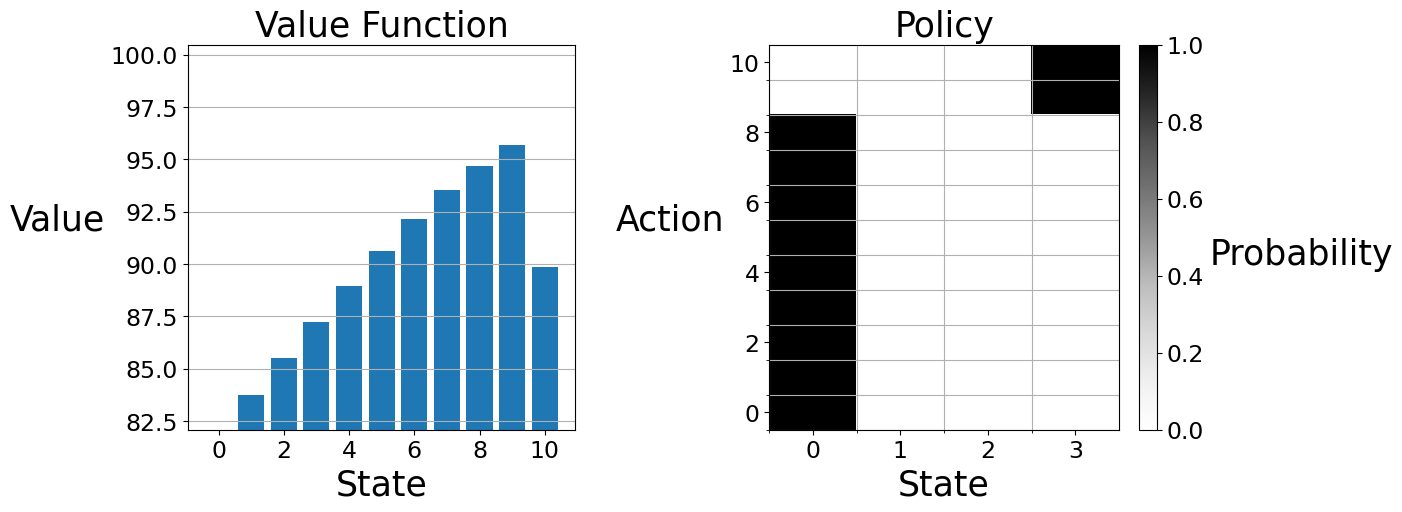

In [4]:
# Run Value Iteration and display result
V_final, pi_final = value_iteration(env)
plot(V_final, pi_final)

In [5]:
print('Value Function:', np.round(V_final, 2))
print('\nPolicy (action probabilities):')
print(np.round(pi_final, 2))

Value Function: [82.09 83.76 85.49 87.25 88.97 90.61 92.15 93.52 94.69 95.68 89.88]

Policy (action probabilities):
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]
